In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import dataset
df1 = pd.read_csv('train.csv')
df1.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


Data Exploration

In [ ]:
print('Shape of data: ', df1.shape)

Shape of data:  (146811, 3)


In [ ]:
df1.isnull().sum() #No null values

review_id    0
review       0
rating       0
dtype: int64

In [ ]:
print('Rating types: ', df1['rating'].unique())
print('Rating proportion:\n', df1['rating'].value_counts())

Rating types:  [1 2 3 4 5]
Rating proportion:
 4    41865
5    41515
3    35941
1    14785
2    12705
Name: rating, dtype: int64


Text(0, 0.5, 'Count')

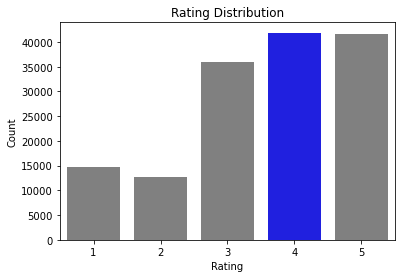

In [ ]:
values = df1['rating'].value_counts().sort_index()
idx = df1['rating'].unique()
clrs = ['grey' if (x < max(values)) else 'blue' for x in values]
ax = sns.barplot(x=idx, y=values, palette=clrs) #color=clrs
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

#Majority of ratings are 4

Text(0.5, 1.0, 'Number of characters present in each sentence')

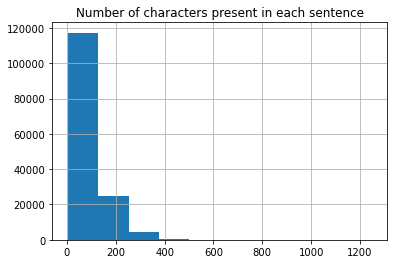

In [ ]:
ax = df1['review'].str.len().hist()
plt.title('Number of characters present in each sentence')

Data Cleansing

In [ ]:
import string
import re

In [ ]:
#Balancing Data Train
df = df1.groupby('rating')
df = pd.DataFrame(df.apply(lambda x: x.sample(df.size().min()).reset_index(drop=True)))
print('Rating proportion:\n',df['rating'].value_counts())

Rating proportion:
 5    12705
4    12705
3    12705
2    12705
1    12705
Name: rating, dtype: int64


In [ ]:
data = df[['review', 'rating']]
data.head()

review  rating
rating                                                             
1      0  Seller block continues, I ask for a refund bil...       1
       1  Looks totally different from the pics. Disappo...       1
       2  So disappointed another size please come to or...       1
       3  3 apr ORDER (chat: ready stock) 10 apr seller ...       1
       4  Be careful shopping these stores cost tp g ,,,...       1

In [ ]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
data['clean_text'] = data['review'].apply(lambda x: remove_punctuation(x))
data.head()

review  rating  \
rating                                                                
1      0  Seller block continues, I ask for a refund bil...       1   
       1  Looks totally different from the pics. Disappo...       1   
       2  So disappointed another size please come to or...       1   
       3  3 apr ORDER (chat: ready stock) 10 apr seller ...       1   
       4  Be careful shopping these stores cost tp g ,,,...       1   

                                                 clean_text  
rating                                                       
1      0  Seller block continues I ask for a refund bile...  
       1  Looks totally different from the pics Disappoi...  
       2  So disappointed another size please come to or...  
       3  3 apr ORDER chat ready stock 10 apr seller wil...  
       4  Be careful shopping these stores cost tp g  ma...

In [ ]:
#remove hyperlink
data['clean_text'] = data['clean_text'].str.replace(r"http\S+", "") 
#remove emoji
data['clean_text'] = data['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
data['clean_text'] = data['clean_text'].str.lower()
data.head()

review  rating  \
rating                                                                
1      0  Seller block continues, I ask for a refund bil...       1   
       1  Looks totally different from the pics. Disappo...       1   
       2  So disappointed another size please come to or...       1   
       3  3 apr ORDER (chat: ready stock) 10 apr seller ...       1   
       4  Be careful shopping these stores cost tp g ,,,...       1   

                                                 clean_text  
rating                                                       
1      0  seller block continues i ask for a refund bile...  
       1  looks totally different from the pics disappoi...  
       2  so disappointed another size please come to or...  
       3  3 apr order chat ready stock 10 apr seller wil...  
       4  be careful shopping these stores cost tp g  ma...

In [ ]:
# not my original code (spanyol code lol)
def recover_shortened_words(text):
  
    text = re.sub(r'\bapaa\b', 'apa', text)
    
    text = re.sub(r'\bbsk\b', 'besok', text)
    text = re.sub(r'\bbrngnya\b', 'barangnya', text)
    text = re.sub(r'\bbrp\b', 'berapa', text)
    text = re.sub(r'\bbgt\b', 'banget', text)
    text = re.sub(r'\bbngt\b', 'banget', text)
    text = re.sub(r'\bgini\b', 'begini', text)
    text = re.sub(r'\bbrg\b', 'barang', text)
    
    text = re.sub(r'\bdtg\b', 'datang', text)
    text = re.sub(r'\bd\b', 'di', text)
    text = re.sub(r'\bsdh\b', 'sudah', text)
    text = re.sub(r'\bdri\b', 'dari', text)
    text = re.sub(r'\bdsni\b', 'disini', text)
    
    text = re.sub(r'\bgk\b', 'gak', text)
    
    text = re.sub(r'\bhrs\b', 'harus', text)
    
    text = re.sub(r'\bjd\b', 'jadi', text)
    text = re.sub(r'\bjg\b', 'juga', text)
    text = re.sub(r'\bjgn\b', 'jangan', text)
    
    text = re.sub(r'\blg\b', 'lagi', text)
    text = re.sub(r'\blgi\b', 'lagi', text)
    text = re.sub(r'\blbh\b', 'lebih', text)
    text = re.sub(r'\blbih\b', 'lebih', text)
    
    text = re.sub(r'\bmksh\b', 'makasih', text)
    text = re.sub(r'\bmna\b', 'mana', text)
    
    text = re.sub(r'\borg\b', 'orang', text)
    
    text = re.sub(r'\bpjg\b', 'panjang', text)
    
    text = re.sub(r'\bka\b', 'kakak', text)
    text = re.sub(r'\bkk\b', 'kakak', text)
    text = re.sub(r'\bklo\b', 'kalau', text)
    text = re.sub(r'\bkmrn\b', 'kemarin', text)
    text = re.sub(r'\bkmrin\b', 'kemarin', text)
    text = re.sub(r'\bknp\b', 'kenapa', text)
    text = re.sub(r'\bkcil\b', 'kecil', text)
    
    text = re.sub(r'\bgmn\b', 'gimana', text)
    text = re.sub(r'\bgmna\b', 'gimana', text)
    
    text = re.sub(r'\btp\b', 'tapi', text)
    text = re.sub(r'\btq\b', 'thanks', text)
    text = re.sub(r'\btks\b', 'thanks', text)
    text = re.sub(r'\btlg\b', 'tolong', text)
    text = re.sub(r'\bgk\b', 'tidak', text)
    text = re.sub(r'\bgak\b', 'tidak', text)
    text = re.sub(r'\bgpp\b', 'tidak apa apa', text)
    text = re.sub(r'\bgapapa\b', 'tidak apa apa', text)
    text = re.sub(r'\bga\b', 'tidak', text)
    text = re.sub(r'\btgl\b', 'tanggal', text)
    text = re.sub(r'\btggl\b', 'tanggal', text)
    text = re.sub(r'\bgamau\b', 'tidak mau', text)
    
    text = re.sub(r'\bsy\b', 'saya', text)
    text = re.sub(r'\bsis\b', 'sister', text)
    text = re.sub(r'\bsdgkan\b', 'sedangkan', text)
    text = re.sub(r'\bmdh2n\b', 'semoga', text)
    text = re.sub(r'\bsmoga\b', 'semoga', text)
    text = re.sub(r'\bsmpai\b', 'sampai', text)
    text = re.sub(r'\bnympe\b', 'sampai', text)
    text = re.sub(r'\bdah\b', 'sudah', text)
    
    text = re.sub(r'\bberkali2\b', 'repeated', text)
  
    text = re.sub(r'\byg\b', 'yang', text)
    
    return text

In [ ]:
data['clean_text'] = data['clean_text'].apply(recover_shortened_words)
data.head()

review  rating  \
rating                                                                
1      0  Seller block continues, I ask for a refund bil...       1   
       1  Looks totally different from the pics. Disappo...       1   
       2  So disappointed another size please come to or...       1   
       3  3 apr ORDER (chat: ready stock) 10 apr seller ...       1   
       4  Be careful shopping these stores cost tp g ,,,...       1   

                                                 clean_text  
rating                                                       
1      0  seller block continues i ask for a refund bile...  
       1  looks totally different from the pics disappoi...  
       2  so disappointed another size please come to or...  
       3  3 apr order chat ready stock 10 apr seller wil...  
       4  be careful shopping these stores cost tapi g  ...

In [ ]:
!pip install nltk
import nltk

nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text) 
    return split
data['clean_text_tokenize']=data['clean_text'].apply(lambda x: tokenize(x.lower()))

[nltk_data] Downloading package punkt to C:\Users\Darren Vernon
[nltk_data]     Riota\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
data['clean_text_tokenize_stopwords'] = data['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))
data.head(10)

[nltk_data] Downloading package stopwords to C:\Users\Darren Vernon
[nltk_data]     Riota\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


review  rating  \
rating                                                                
1      0  Seller block continues, I ask for a refund bil...       1   
       1  Looks totally different from the pics. Disappo...       1   
       2  So disappointed another size please come to or...       1   
       3  3 apr ORDER (chat: ready stock) 10 apr seller ...       1   
       4  Be careful shopping these stores cost tp g ,,,...       1   
       5  Very wrong wasted money easily break and then ...       1   
       6   Poor poor poor service quality merchandise va...       1   
       7  Message size M motif mouth open toe harmony bu...       1   
       8  Good product quality, fast delivery, but its s...       1   
       9  Send the wrong color. Chon send red brown. Oka...       1   

                                                 clean_text  \
rating                                                        
1      0  seller block continues i ask for a refund bile...   
       1  looks totally different from the pics disappoi...   
       2  so disappointed another size please come to or...   
       3  3 apr order chat ready stock 10 apr seller wil...   
       4  be careful shopping these stores cost tapi g  ...   
       5  very wrong wasted money easily break and then ...   
       6   poor poor poor service quality merchandise va...   
       7  message size m motif mouth open toe harmony bu...   
       8  good product quality fast delivery but its sel...   
       9  send the wrong color chon send red brown okay ...   

                                        clean_text_tokenize  \
rating                                                        
1      0  [seller, block, continues, i, ask, for, a, ref...   
       1  [looks, totally, different, from, the, pics, d...   
       2  [so, disappointed, another, size, please, come...   
       3  [3, apr, order, chat, ready, stock, 10, apr, s...   
       4  [be, careful, shopping, these, stores, cost, t...   
       5  [very, wrong, wasted, money, easily, break, an...   
       6  [, poor, poor, poor, service, quality, merchan...   
       7  [message, size, m, motif, mouth, open, toe, ha...   
       8  [good, product, quality, fast, delivery, but, ...   
       9  [send, the, wrong, color, chon, send, red, bro...   

                              clean_text_tokenize_stopwords  
rating                                                       
1      0  [seller, block, continues, ask, refund, bile, ...  
       1  [looks, totally, different, pics, disappointed...  
       2  [disappointed, another, size, please, come, or...  
       3  [3, apr, order, chat, ready, stock, 10, apr, s...  
       4  [careful, shopping, stores, cost, tapi, g, man...  
       5  [wrong, wasted, money, easily, break, curve, e...  
       6  [, poor, poor, poor, service, quality, merchan...  
       7  [message, size, motif, mouth, open, toe, harmo...  
       8  [good, product, quality, fast, delivery, selle...  
       9  [send, wrong, color, chon, send, red, brown, o...

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
detok = TreebankWordDetokenizer()
data['clean_text_stopwords'] = data['clean_text_tokenize_stopwords'].apply(lambda x: detok.detokenize(x))

In [ ]:
data.head(5)

review  rating  \
rating                                                                
1      0  Seller block continues, I ask for a refund bil...       1   
       1  Looks totally different from the pics. Disappo...       1   
       2  So disappointed another size please come to or...       1   
       3  3 apr ORDER (chat: ready stock) 10 apr seller ...       1   
       4  Be careful shopping these stores cost tp g ,,,...       1   

                                                 clean_text  \
rating                                                        
1      0  seller block continues i ask for a refund bile...   
       1  looks totally different from the pics disappoi...   
       2  so disappointed another size please come to or...   
       3  3 apr order chat ready stock 10 apr seller wil...   
       4  be careful shopping these stores cost tapi g  ...   

                                        clean_text_tokenize  \
rating                                                        
1      0  [seller, block, continues, i, ask, for, a, ref...   
       1  [looks, totally, different, from, the, pics, d...   
       2  [so, disappointed, another, size, please, come...   
       3  [3, apr, order, chat, ready, stock, 10, apr, s...   
       4  [be, careful, shopping, these, stores, cost, t...   

                              clean_text_tokenize_stopwords  \
rating                                                        
1      0  [seller, block, continues, ask, refund, bile, ...   
       1  [looks, totally, different, pics, disappointed...   
       2  [disappointed, another, size, please, come, or...   
       3  [3, apr, order, chat, ready, stock, 10, apr, s...   
       4  [careful, shopping, stores, cost, tapi, g, man...   

                                       clean_text_stopwords  
rating                                                       
1      0  seller block continues ask refund bile goods x...  
       1  looks totally different pics disappointed qual...  
       2  disappointed another size please come order 40...  
       3  3 apr order chat ready stock 10 apr seller inf...  
       4  careful shopping stores cost tapi g mandate ca...

In [ ]:
df_clean = data[['clean_text', 'clean_text_stopwords', 'rating']]
df_clean.head(5)

# terserah, mau pakai clean text (masih ada stopwords) atau pakai clean_text_stopwords (sudah tidak ada stopwords)

clean_text  \
rating                                                        
1      0  seller block continues i ask for a refund bile...   
       1  looks totally different from the pics disappoi...   
       2  so disappointed another size please come to or...   
       3  3 apr order chat ready stock 10 apr seller wil...   
       4  be careful shopping these stores cost tapi g  ...   

                                       clean_text_stopwords  rating  
rating                                                               
1      0  seller block continues ask refund bile goods x...       1  
       1  looks totally different pics disappointed qual...       1  
       2  disappointed another size please come order 40...       1  
       3  3 apr order chat ready stock 10 apr seller inf...       1  
       4  careful shopping stores cost tapi g mandate ca...       1

Modeling: Support Vector Machine (SVM)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
#Vectorizing Dataset
tfidf = TfidfVectorizer(max_features=6527, ngram_range=(1,3), analyzer='char')
X = tfidf.fit_transform(data['clean_text'])
Y = data['rating']
X.shape, Y.shape

((63525, 6527), (63525,))

In [ ]:
#Splitting Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(57172, 6527) (57172,)
(6353, 6527) (6353,)


Model accuracy: 0.4887454745789391
F1 Score : 0.48402229781695016
Precision : 0.48253499466920335
Recall : 0.4894620745504952
              precision    recall  f1-score   support

           1       0.59      0.72      0.65      1270
           2       0.50      0.46      0.48      1264
           3       0.48      0.48      0.48      1223
           4       0.41      0.34      0.38      1297
           5       0.43      0.44      0.44      1299

    accuracy                           0.49      6353
   macro avg       0.48      0.49      0.48      6353
weighted avg       0.48      0.49      0.48      6353



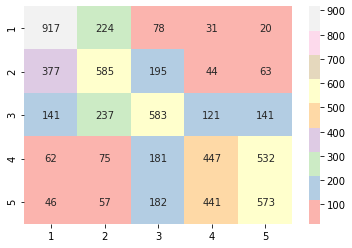

In [ ]:
#Test
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

clf = LinearSVC()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print('Model accuracy: %s' % accuracy_score(Y_test, y_pred))
print('F1 Score :', f1_score(Y_test, y_pred, average='macro'))
print('Precision :', precision_score(Y_test, y_pred, average='macro'))
print('Recall :', recall_score(Y_test, y_pred, average='macro'))
print(classification_report(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)
cm = pd.DataFrame(cm, [1,2,3,4,5], [1,2,3,4,5])

sns.heatmap(cm, annot=True, cmap="Pastel1", fmt="d")
plt.show()

Model accuracy: 0.6128874274120198
F1 Score : 0.6084036903736613
Precision : 0.6087472733354253
Recall : 0.612799194359219
              precision    recall  f1-score   support

           1       0.68      0.84      0.75     11435
           2       0.64      0.59      0.61     11441
           3       0.62      0.61      0.61     11482
           4       0.56      0.48      0.52     11408
           5       0.54      0.55      0.55     11406

    accuracy                           0.61     57172
   macro avg       0.61      0.61      0.61     57172
weighted avg       0.61      0.61      0.61     57172



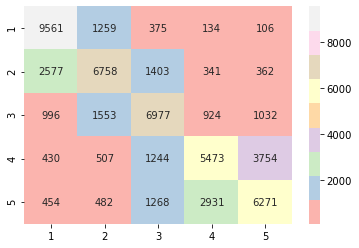

In [ ]:
#Train
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

clf = LinearSVC() #Kalau ingin regularisasi data C = 10 atau lebih dan class_weight = 'balanced'
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_train)

print('Model accuracy: %s' % accuracy_score(Y_train, y_pred))
print('F1 Score :', f1_score(Y_train, y_pred, average='macro'))
print('Precision :', precision_score(Y_train, y_pred, average='macro'))
print('Recall :', recall_score(Y_train, y_pred, average='macro'))
print(classification_report(Y_train, y_pred))

cm = confusion_matrix(Y_train, y_pred)
cm = pd.DataFrame(cm, [1,2,3,4,5], [1,2,3,4,5])

sns.heatmap(cm, annot=True, cmap="Pastel1", fmt="d")
plt.show()

In [ ]:
test_predict = clf.predict(X_test)
df_SVM = pd.concat([df1['review_id'], pd.Series(test_predict, name='rating')], axis=1)
df_SVM.to_csv('sample_SVM.csv', index=False)
df_SVM.head(11)

,review_id,rating
0,0,1.0
1,1,2.0
2,2,4.0
3,3,1.0
4,4,5.0
5,5,3.0
6,6,1.0
7,7,5.0
8,8,5.0
9,9,4.0
